In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.decomposition import PCA

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

# Lab 23 - Silhouette score revisited and Principal Components Analysis

Load the iris dataset, as in previous labs.

In [2]:
iris_dict = datasets.load_iris()

iris = pd.DataFrame(iris_dict.data, columns = iris_dict.feature_names)
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Scale the columns of the iris dataset.

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
iris_scaled = scaler.fit_transform(iris)

Below is code to compute the silhouette coefficient for each data point, with the number of clusters ranging from 2 to 6.

For n_clusters = 2 The average silhouette_score is : 0.630047128435471
For n_clusters = 3 The average silhouette_score is : 0.5047687565398588
For n_clusters = 4 The average silhouette_score is : 0.4450654880459854
For n_clusters = 5 The average silhouette_score is : 0.3506774898464648
For n_clusters = 6 The average silhouette_score is : 0.3524618716009234


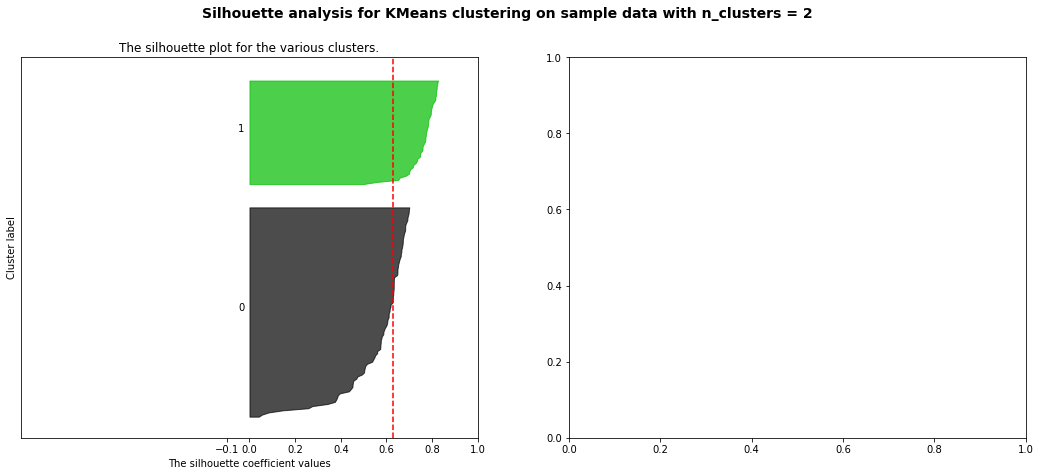

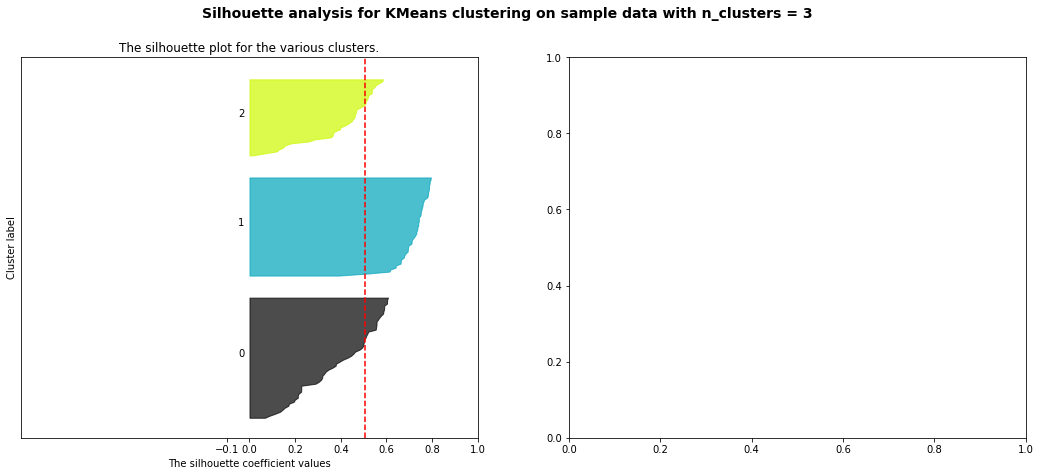

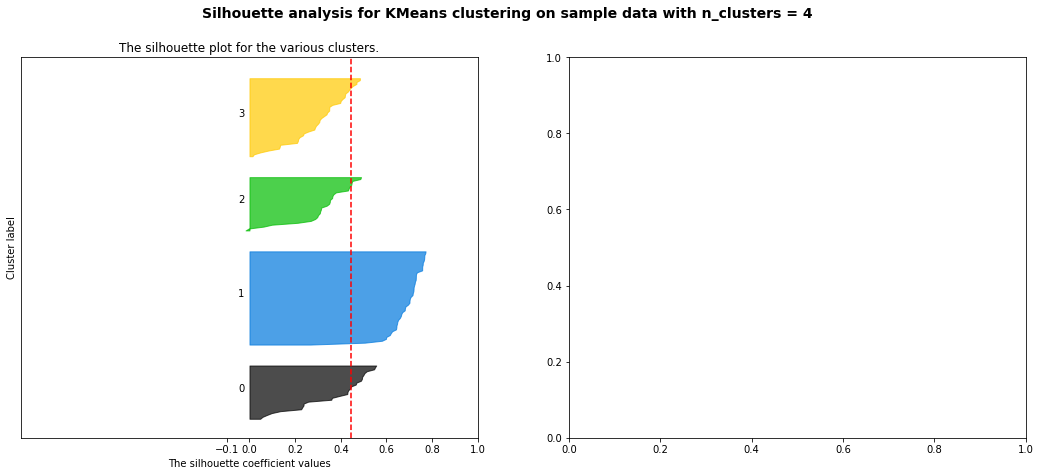

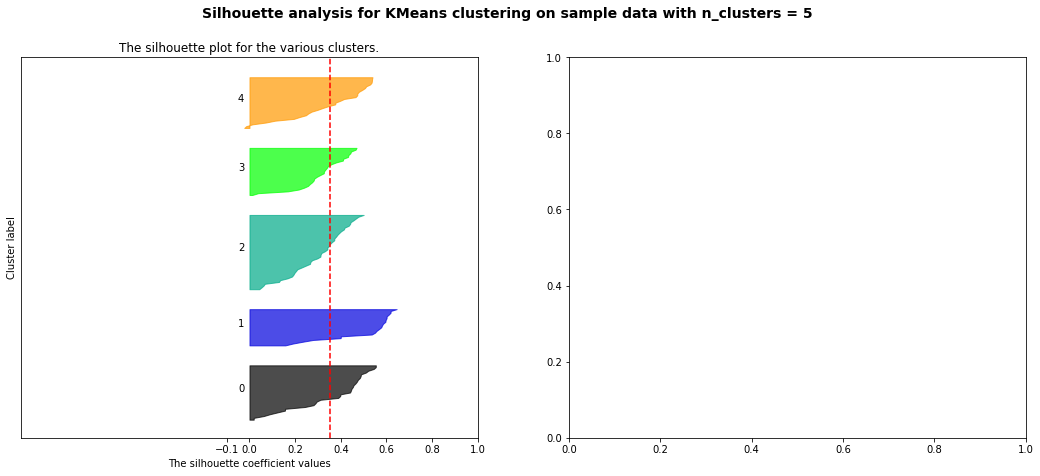

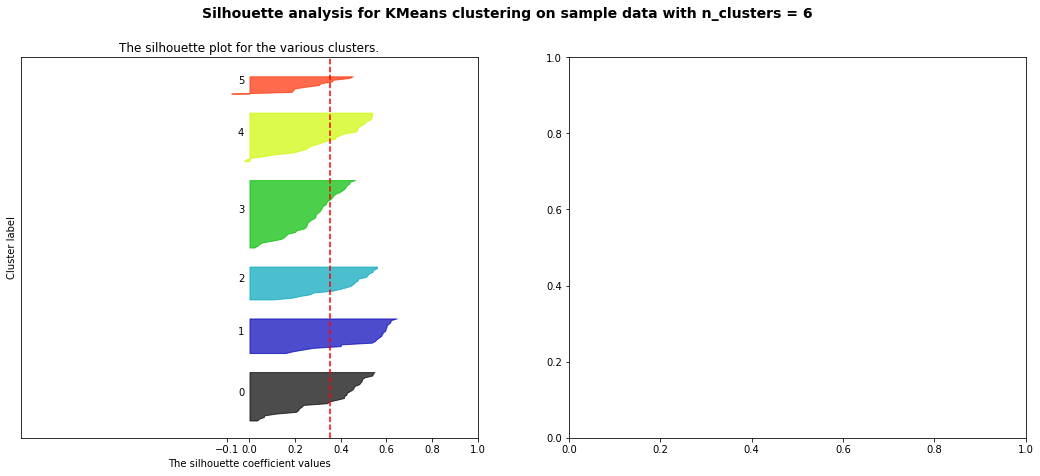

In [6]:
for k in range(2,7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(iris_scaled) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(iris_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(iris_scaled, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(iris_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')


## Principal Components Analysis

Principal Components Analysis or PCA reduces the dimensions of the data set by successively finding the directions with the most variation and using these directions as the new coordinate system.

The following code finds the first two principal components for the iris dataset:

In [7]:
pca = PCA(n_components=2)
pca.fit(iris)
iris_rotated = pca.transform(iris)

Let's create a new dataframe with the principal components and the species names.

In [9]:
iris_rotated_df = pd.DataFrame(iris_rotated, columns = ["PC1","PC2"])
iris_rotated_df["Species"] = iris_dict.target
iris_rotated_df

PC1       PC2  Species
0   -2.684126  0.319397        0
1   -2.714142 -0.177001        0
2   -2.888991 -0.144949        0
3   -2.745343 -0.318299        0
4   -2.728717  0.326755        0
5   -2.280860  0.741330        0
6   -2.820538 -0.089461        0
7   -2.626145  0.163385        0
8   -2.886383 -0.578312        0
9   -2.672756 -0.113774        0
10  -2.506947  0.645069        0
11  -2.612755  0.014730        0
12  -2.786109 -0.235112        0
13  -3.223804 -0.511395        0
14  -2.644750  1.178765        0
15  -2.386039  1.338062        0
16  -2.623528  0.810680        0
17  -2.648297  0.311849        0
18  -2.199820  0.872839        0
19  -2.587986  0.513560        0
20  -2.310256  0.391346        0
21  -2.543705  0.432996        0
22  -3.215939  0.133468        0
23  -2.302733  0.098709        0
24  -2.355754 -0.037282        0
25  -2.506669 -0.146017        0
26  -2.468820  0.130951        0
27  -2.562320  0.367719        0
28  -2.639535  0.312040        0
29  -2.631989 -0.196961        0
..        ...       ...      ...
120  2.427818  0.378196        2
121  1.199001 -0.606092        2
122  3.499920  0.460674        2
123  1.388766 -0.204399        2
124  2.275431  0.334991        2
125  2.614090  0.560901        2
126  1.258508 -0.179705        2
127  1.291132 -0.116669        2
128  2.123609 -0.209729        2
129  2.388003  0.464640        2
130  2.841673  0.375269        2
131  3.230674  1.374165        2
132  2.159438 -0.217278        2
133  1.444161 -0.143413        2
134  1.781295 -0.499902        2
135  3.076500  0.688086        2
136  2.144243  0.140064        2
137  1.905098  0.049301        2
138  1.169326 -0.164990        2
139  2.107611  0.372288        2
140  2.314155  0.183651        2
141  1.922268  0.409203        2
142  1.415236 -0.574916        2
143  2.563013  0.277863        2
144  2.418746  0.304798        2
145  1.944110  0.187532        2
146  1.527167 -0.375317        2
147  1.764346  0.078859        2
148  1.900942  0.116628        2
149  1.390189 -0.282661        2

[150 rows x 3 columns]

Display this dataframe.

Use Seaborn to plot a scatter plot where x is PC1 and y is PC2, with the points colored by the species.

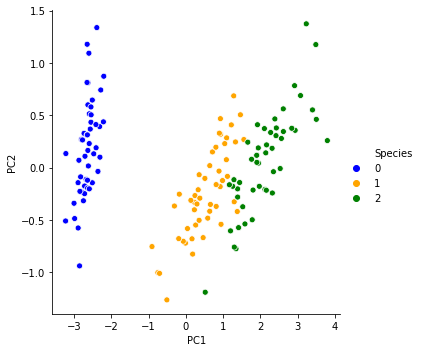

In [13]:
sns.relplot(x = "PC1", y = "PC2", data = iris_rotated_df, hue = "Species", \
           palette = ["blue","orange","green"])

Let's compare this scatter plot with all possible scatter plots from the original data. 

First create a new dataframe with the original iris data and the species names.

In [16]:
iris["Species"] = iris_dict.target
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

Now use pairplot() to plot the scatter plots.  hue will also work as a parameter here.

/home/megan.owen/.local/lib/python3.4/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/megan.owen/.local/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


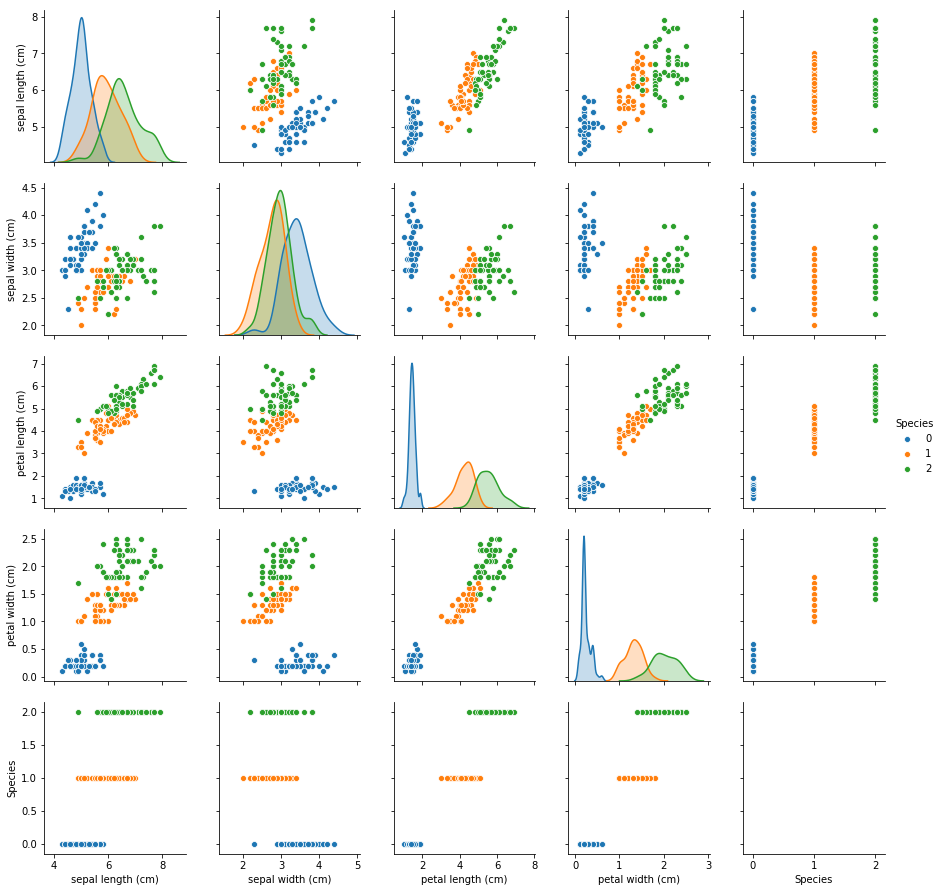

In [17]:
sns.pairplot(iris, hue = "Species")

Load the labor dataset.

In [19]:
labor = pd.read_csv("Nov2019_labor_market_majors.csv", skiprows = 13, \
                    skipfooter = 3, index_col = "Major")
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(float)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(float)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
labor.head()

Transform the labor data.

In [23]:
labor_scaled = scaler.fit_transform(labor)

Put the data into a dataframe.

In [25]:
labor_scaled = pd.DataFrame(labor_scaled,columns = labor.columns, index = labor.index)
labor_scaled

Unemployment Rate  Underemployment Rate  \
Major                                                                         
Agriculture                                  0.308824              0.687702   
Animal and Plant Sciences                    0.294118              0.744337   
Environmental Studies                        0.529412              0.613269   
Architecture                                 0.485294              0.245955   
Ethnic Studies                               0.691176              0.626214   
Communications                               0.426471              0.673139   
Journalism                                   0.397059              0.503236   
Mass Media                                   1.000000              0.708738   
Advertising and Public Relations             0.397059              0.587379   
Information Systems and Management           0.588235              0.432039   
Computer Science                             0.544118              0.195793   
General Education                            0.102941              0.174757   
Early Childhood Education                    0.102941              0.126214   
Elementary Education                         0.132353              0.072816   
Secondary Education                          0.191176              0.195793   
Special Education                            0.279412              0.077670   
Miscellaneous Education                      0.029412              0.098706   
General Engineering                          0.588235              0.195793   
Aerospace Engineering                        0.455882              0.249191   
Chemical Engineering                         0.235294              0.165049   
Civil Engineering                            0.132353              0.098706   
Computer Engineering                         0.220588              0.140777   
Electrical Engineering                       0.529412              0.176375   
Industrial Engineering                       0.352941              0.095469   
Mechanical Engineering                       0.485294              0.155340   
Miscellaneous Engineering                    0.485294              0.291262   
Foreign Language                             0.470588              0.563107   
Family and Consumer Sciences                 0.485294              0.537217   
English Language                             0.632353              0.634304   
Liberal Arts                                 0.838235              0.760518   
...                                               ...                   ...   
Psychology                                   0.455882              0.619741   
Criminal Justice                             0.455882              1.000000   
Public Policy and Law                        0.102941              0.831715   
Social Services                              0.367647              0.325243   
Anthropology                                 0.823529              0.771845   
Economics                                    0.455882              0.459547   
Geography                                    0.588235              0.357605   
Political Science                            0.470588              0.648867   
Sociology                                    0.426471              0.721683   
General Social Sciences                      0.529412              0.661812   
Construction Services                        0.750000              0.365696   
Art History                                  0.411765              0.729773   
Fine Arts                                    0.676471              0.760518   
Performing Arts                              0.397059              0.878641   
Commercial Art and Graphic Design            0.573529              0.401294   
Health Services                              0.308824              0.555016   
Medical Technicians                          0.000000              0.639159   
Nursing                                      0.147059              0.000000   
Pharmac

Find the first two principal components using the unscaled labor data.

In [26]:
pca2 = PCA(n_components=2)
pca2.fit(labor)
labor_rotated = pca2.transform(labor)

Use k-means to cluster the scaled labor data.

In [35]:
kmeans = KMeans(n_clusters = 4)
kmeans_clusters = kmeans.fit_predict(labor_scaled)

Create a new dataframe with the principal components and the cluster labels.

In [36]:
labor_rotated_df = pd.DataFrame(labor_rotated, columns = ["PC1","PC2"])
labor_rotated_df["cluster"] = kmeans_clusters
labor_rotated_df

PC1           PC2  cluster
0   -9397.382267  -2021.829909        3
1  -11870.884897   2323.493809        3
2   -7030.863971   3927.920096        3
3    6112.082079   1053.330863        2
4  -12993.972301  -1767.797265        1
5    -706.746142   2925.172045        3
6   -6041.461115   2189.782494        3
7  -11870.884130   2323.483547        3
8    1031.382796   3914.562809        3
9    8585.579684  -3291.971886        2
10  31903.259711  -3826.734024        2
11 -24412.126538  -5966.114318        0
12 -29817.710998  -4555.579814        0
13 -26644.951880  -6086.461064        0
14 -19077.408478  -5230.735998        0
15 -23917.424226  -6835.178736        0
16 -21310.233928  -5351.079058        0
17  24830.414058  -5551.508596        2
18  37237.977096  -3091.343965        2
19  41823.970740  -5083.502497        2
20  26568.543213  -4562.116034        2
21  42947.061111   -992.220660        2
22  37732.678898  -3960.416354        2
23  25940.153711  -9522.465772        2
24  35005.151585  -3211.695357        2
25  22223.221332  -7035.597464        2
26 -11870.881132   2323.485555        1
27 -22045.617290    -16.339269        3
28 -11870.882601   2323.489618        1
29 -12662.405675   3713.992234        3
..           ...           ...      ...
43 -15841.836925   1213.752199        1
44 -10881.489605    585.384832        3
45  -9397.385257  -2021.806653        3
46 -27432.471880  -2277.267851        0
47 -15467.476770   2577.526453        1
48  24095.034295   -216.770655        2
49    282.660986   1187.025494        1
50   4627.972858   3660.559197        1
51 -15545.018865    692.316355        3
52 -11376.182885   1454.425887        3
53  20244.418631  -3559.356677        2
54  -9941.553452  -1065.848075        3
55 -16958.253563   1153.582450        3
56 -16082.516296   5679.418613        3
57  -9397.376323  -2021.858697        3
58 -15721.498589  -1019.077534        1
59  -4634.906190  -2302.594268        3
60   4240.270707  -5765.508753        2
61  38401.123186  25186.663895        2
62  -5292.731351   4917.303924        0
63   1766.754174  -1420.135479        3
64   5978.393987  -4776.091263        2
65  -5052.066262    451.680171        3
66  23346.308481  -2944.307741        2
67   3758.908862   3165.844403        3
68  18265.616444    -83.093519        2
69   6112.074338   1053.365093        1
70  -6161.801664   4422.633456        1
71  12930.896656   -818.466887        2
72   -452.721514   6521.763970        3

[73 rows x 3 columns]

Plot the colored-by-cluster data using the principal component coordinates.

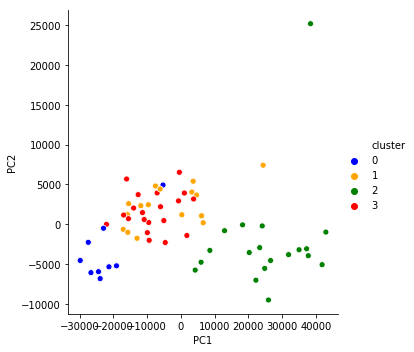

In [39]:
sns.relplot(x = "PC1", y = "PC2",data = labor_rotated_df, hue = "cluster",\
           palette = ["blue","orange","green","red"])

We can even find the first three principal components and plot them in 3D.

In [40]:
pca2 = PCA(n_components=3)
pca2.fit(labor)
labor2_rotated = pca2.transform(labor)

In [41]:
labor2_rotated_df = pd.DataFrame(labor2_rotated,columns = ["PC1","PC2","PC3"])
labor2_rotated_df["Cluster"] = kmeans_clusters

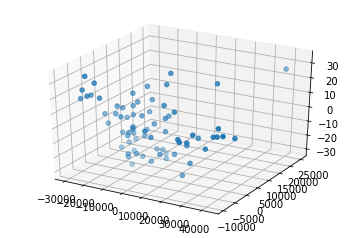

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(labor2_rotated_df["PC1"], labor2_rotated_df["PC2"], labor2_rotated_df["PC3"]);